In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gymshark-products-dataset/gymshark_products.csv


In [2]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

dt = pd.read_csv('/kaggle/input/gymshark-products-dataset/gymshark_products.csv')
dt.head()

,title,product_type,vendor,tags,handle,variant_title,sku,price,inventory_quantity,image_src
0,Gymshark Vital Crop Top - Base Green Marl,Womens Crop Tops,Gymshark | Be a visionary.,"02/10/25, activity:Conditioning, akeneo_update...",gymshark-vital-seamless-2-0-crop-top-base-gree...,Extra Small,B1A3D-ECH3-XS,35.0,NaN,https://cdn.shopify.com/s/files/1/0098/8822/fi...
1,Gymshark Vital Crop Top - Base Green Marl,Womens Crop Tops,Gymshark | Be a visionary.,"02/10/25, activity:Conditioning, akeneo_update...",gymshark-vital-seamless-2-0-crop-top-base-gree...,Small,B1A3D-ECH3-S,35.0,NaN,https://cdn.shopify.com/s/files/1/0098/8822/fi...
2,Gymshark Vital Crop Top - Base Green Marl,Womens Crop Tops,Gymshark | Be a visionary.,"02/10/25, activity:Conditioning, akeneo_update...",gymshark-vital-seamless-2-0-crop-top-base-gree...,Medium,B1A3D-ECH3-M,35.0,NaN,https://cdn.shopify.com/s/files/1/0098/8822/fi...
3,Gymshark Vital Crop Top - Base Green Marl,Womens Crop Tops,Gymshark | Be a visionary.,"02/10/25, activity:Conditioning, akeneo_update...",gymshark-vital-seamless-2-0-crop-top-base-gree...,Large,B1A3D-ECH3-L,35.0,NaN,https://cdn.shopify.com/s/files/1/0098/8822/fi...
4,Gymshark Vital Crop Top - Base Green Marl,Womens Crop Tops,Gymshark | Be a visionary.,"02/10/25, activity:Conditioning, akeneo_update...",gymshark-vital-seamless-2-0-crop-top-base-gree...,Extra Large,B1A3D-ECH3-XL,35.0,NaN,https://cdn.shopify.com/s/files/1/0098/8822/fi...


In [3]:
dt.shape
dt.describe()
dt.isna().sum()
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44831 entries, 0 to 44830
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               44831 non-null  object 
 1   product_type        44824 non-null  object 
 2   vendor              44831 non-null  object 
 3   tags                44831 non-null  object 
 4   handle              44831 non-null  object 
 5   variant_title       44831 non-null  object 
 6   sku                 44831 non-null  object 
 7   price               44831 non-null  float64
 8   inventory_quantity  0 non-null      float64
 9   image_src           44703 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.4+ MB


In [4]:
num_cols = dt.select_dtypes(include= [float,int])
print(np.isinf(num_cols).sum())

price                 0
inventory_quantity    0
dtype: int64


In [5]:
dt['price'].head(10)

0    35.0
1    35.0
2    35.0
3    35.0
4    35.0
5    35.0
6    40.0
7    40.0
8    40.0
9    40.0
Name: price, dtype: float64

In [6]:
dt['title'] = dt['title'].fillna('')
dt['tags'] = dt['tags'].fillna('')

dt['text'] = dt['title'] +' '+ dt['tags']

dt['product_type'] = dt['product_type'].fillna('unkown')
dt['vendor'] = dt['vendor'].fillna('unkown')
print(dt[['text', 'product_type', 'vendor', 'price']].head())

                                                text      product_type  \
0  Gymshark Vital Crop Top - Base Green Marl 02/1...  Womens Crop Tops   
1  Gymshark Vital Crop Top - Base Green Marl 02/1...  Womens Crop Tops   
2  Gymshark Vital Crop Top - Base Green Marl 02/1...  Womens Crop Tops   
3  Gymshark Vital Crop Top - Base Green Marl 02/1...  Womens Crop Tops   
4  Gymshark Vital Crop Top - Base Green Marl 02/1...  Womens Crop Tops   

                       vendor  price  
0  Gymshark | Be a visionary.   35.0  
1  Gymshark | Be a visionary.   35.0  
2  Gymshark | Be a visionary.   35.0  
3  Gymshark | Be a visionary.   35.0  
4  Gymshark | Be a visionary.   35.0  


In [7]:
from sklearn.preprocessing import LabelEncoder

label =  LabelEncoder()
dt['product_type_encoded'] = label.fit_transform(dt['product_type'])

label_vendor = LabelEncoder()
dt['vendor_encoded'] = label_vendor.fit_transform(dt['vendor'])

print(dt[['product_type', 'product_type_encoded', 'vendor', 'vendor_encoded']].head())



       product_type  product_type_encoded                      vendor  \
0  Womens Crop Tops                    47  Gymshark | Be a visionary.   
1  Womens Crop Tops                    47  Gymshark | Be a visionary.   
2  Womens Crop Tops                    47  Gymshark | Be a visionary.   
3  Womens Crop Tops                    47  Gymshark | Be a visionary.   
4  Womens Crop Tops                    47  Gymshark | Be a visionary.   

   vendor_encoded  
0               3  
1               3  
2               3  
3               3  
4               3  


In [8]:
dt['price'] = dt['price'].fillna(0)
max_price = dt['price'].max()
dt['price_scaled'] = dt['price']/max_price

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



vocab_size= 10000

max_length = 30

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(dt['text'])  # learn the vocabulary from our text

# convert each text to a sequence of numbers
sequences = tokenizer.texts_to_sequences(dt['text'])

# make all sequences the same length (padding)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

print("✅ Tokenizing done")
print("Vocabulary size:", len(tokenizer.word_index))
print("Example padded sequence:", padded_sequences[0])

2025-10-18 10:57:45.460978: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760785065.749290      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760785065.834318      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


✅ Tokenizing done
Vocabulary size: 5462
Example padded sequence: [  3   2  48   3  41  31 113  49   8  16   5  82  19  51  94  27  40  37
  56  25 132  72   8  16   5  23  54 113  19  64]


In [10]:
from sklearn.model_selection import train_test_split


X_text = np.array(padded_sequences)
X_vendor = np.array(dt['vendor_encoded'])
X_price = np.array(dt['price_scaled']) 

y = np.array(dt['product_type_encoded']) 

(
    X_text_train,
    X_text_test,
    X_vendor_train,
    X_vendor_test,
    X_price_train,
    X_price_test,
    y_train,
    y_test
) = train_test_split(
    X_text,
    X_vendor,
    X_price,
    y,
    test_size=0.2,
    random_state=42
)

print("✅ Splitting done")
print("Train size:", X_text_train.shape[0])
print("Test size:", X_text_test.shape[0])

✅ Splitting done
Train size: 35864
Test size: 8967


In [11]:
if 'inventory_quantity' in dt.columns:
    dt = dt.drop(columns=['inventory_quantity'])

# Fill image_src NaN values with empty string
dt['image_src'] = dt['image_src'].fillna('')

print(dt.isna().sum())

title                   0
product_type            0
vendor                  0
tags                    0
handle                  0
variant_title           0
sku                     0
price                   0
image_src               0
text                    0
product_type_encoded    0
vendor_encoded          0
price_scaled            0
dtype: int64


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


num_classes = len(dt['product_type'].unique())
num_vendors = len(dt['vendor'].unique())


# ---------------- TEXT INPUT ----------------
text_input = keras.Input(shape=(X_text_train.shape[1],), name="text_input")
text_embedding = layers.Embedding(input_dim=10000, output_dim=64)(text_input)
text_features = layers.GlobalAveragePooling1D()(text_embedding)

# ---------------- VENDOR INPUT ----------------
vendor_input = keras.Input(shape=(1,), name="vendor_input")
vendor_embedding = layers.Embedding(input_dim=num_vendors+1, output_dim=8)(vendor_input)
vendor_features = layers.Flatten()(vendor_embedding)

# ---------------- PRICE INPUT ----------------
price_input = keras.Input(shape=(1,), name="price_input")
price_features = layers.Dense(8, activation="relu")(price_input)

# ---------------- COMBINE FEATURES ----------------
combined = layers.Concatenate()([text_features, vendor_features, price_features])

# ---------------- HIDDEN LAYERS ----------------
x = layers.Dense(64, activation="relu")(combined)
x = layers.Dropout(0.3)(x)
x = layers.Dense(32, activation="relu")(x)

# ---------------- OUTPUT LAYER ----------------
output = layers.Dense(num_classes, activation="softmax")(x)

# ---------------- BUILD MODEL ----------------
model = keras.Model(inputs=[text_input, vendor_input, price_input], outputs=output)

# ---------------- COMPILE MODEL ----------------
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


2025-10-18 10:58:05.779434: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vendor_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 30, 64)    │    640,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 8)      │         40 │ vendor_input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ price_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ embedding[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 8)         │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 8)         │         16 │ price_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 80)        │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ flatten[0][0],    │
│                     │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      5,184 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      2,080 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 92)        │      3,036 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 650,356 (2.48 MB)

 Trainable params: 650,356 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.fit(
    [X_text_train, X_vendor_train, X_price_train],
    y_train,
    validation_data=([X_text_test, X_vendor_test, X_price_test], y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3383 - loss: 2.6511 - val_accuracy: 0.6961 - val_loss: 0.8838
Epoch 2/10
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6913 - loss: 0.9105 - val_accuracy: 0.7624 - val_loss: 0.6578
Epoch 3/10
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7635 - loss: 0.6832 - val_accuracy: 0.8317 - val_loss: 0.5192
Epoch 4/10
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8086 - loss: 0.5701 - val_accuracy: 0.8616 - val_loss: 0.4399
Epoch 5/10
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8336 - loss: 0.4949 - val_accuracy: 0.8701 - val_loss: 0.3874
Epoch 6/10
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8492 - loss: 0.4519 - val_accuracy: 0.8819 - val_loss: 0.3531
Epoch 7/10
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8621 - loss: 0.4099 - val_accuracy: 0.8923 - val_loss: 0.3338
Epoch 8/10
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8677 - loss: 0.3881 -

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8991 - loss: 0.2850
Test loss & accuracy: [0.2809935510158539, 0.9005241394042969]
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification report (precision, recall, f1):
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       267
           1       0.00      0.00      0.00         2
           2       0.57      0.67      0.62         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         3
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00         1
           7       0.17      0.25      0.20         4
           8       1.00      0.50      0.67        28
           9       0.70      0.93      0.80       167
          10       1.00      0.59      0.74        27
          11       0.94      0.93      0.93       286
          12       1.00      0.95      0.97        19
          13    

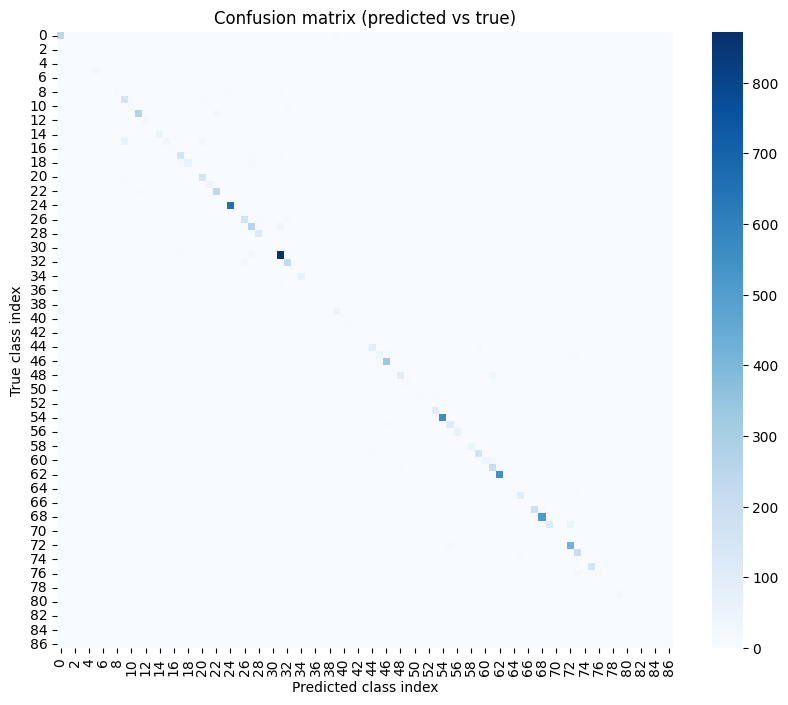

No `history` object found (skip plotting).


In [14]:
# -------------- EVALUATION --------------

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# 1) Basic evaluate (loss & accuracy)
eval_results = model.evaluate(
    [X_text_test, X_vendor_test, X_price_test],
    y_test,
    verbose=1
)
print("Test loss & accuracy:", eval_results)

# 2) Predictions and classification metrics
y_probs = model.predict([X_text_test, X_vendor_test, X_price_test], verbose=1)  # shape (N, num_classes)
y_pred = np.argmax(y_probs, axis=1)

print("\nClassification report (precision, recall, f1):")
print(classification_report(y_test, y_pred, zero_division=0))

# 3) Top-k accuracy (useful for recommendation-like tasks; k=3)
top3 = tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3)
top3.update_state(y_test, y_probs)
print(f"Top-3 accuracy: {top3.result().numpy():.4f}")

# 4) Confusion matrix (visual)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap='Blues', square=True)
plt.title("Confusion matrix (predicted vs true)")
plt.ylabel("True class index")
plt.xlabel("Predicted class index")
plt.show()

# 5) (Optional) Plot training curves if 'history' is available
try:
    hist = history.history
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(hist['loss'], label='train loss')
    plt.plot(hist['val_loss'], label='val loss')
    plt.legend(); plt.title('Loss')

    plt.subplot(1,2,2)
    plt.plot(hist['accuracy'], label='train acc')
    plt.plot(hist['val_accuracy'], label='val acc')
    plt.legend(); plt.title('Accuracy')

    plt.show()
except NameError:
    print("No `history` object found (skip plotting).")


In [15]:
from tensorflow.keras import Model

# Get the layer before the output (the one that contains the learned "meaning")
embedding_layer = model.layers[-2].output
embedding_model = Model(inputs=model.input, outputs=embedding_layer)

# Generate embeddings for all products
all_embeddings = embedding_model.predict([X_text, X_vendor, X_price], verbose=1)


1401/1401 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [16]:
from sklearn.metrics.pairwise import cosine_similarity
dt = dt.drop_duplicates(subset=['title', 'vendor', 'price'])
dt = dt.reset_index(drop=True)

# Compute cosine similarity between all products
similarity_matrix = cosine_similarity(all_embeddings)


# Function to recommend top N similar products
def recommend_products(index, top_n=5):
    scores = similarity_matrix[index]
    similar_indices = np.argsort(scores)[::-1][1:top_n+1]  # skip itself
    print("Product:", dt.iloc[index]['title'])
    print("\nTop Recommendations:")
    for i in similar_indices:
        print(f"- {dt.iloc[i]['title']} | Vendor: {dt.iloc[i]['vendor']} | Price: {dt.iloc[i]['price']}")


In [17]:
recommend_products(0, top_n=5)


Product: Gymshark Vital Crop Top - Base Green Marl

Top Recommendations:
- Gymshark x Analis Seamless Sports Bra - Reps Red/Carmine Red | Vendor: Gymshark | Be a visionary. | Price: 40.0
- Gymshark x Analis Cropped Polo - Midnight Blue | Vendor: Gymshark | Be a visionary. | Price: 35.0
- Gymshark x Analis Seamless Sports Bra - Midnight Blue/Lats Blue | Vendor: Gymshark | Be a visionary. | Price: 40.0
- Gymshark x Analis Seamless Leggings - Black/Silver Grey | Vendor: Gymshark | Be a visionary. | Price: 60.0
- Gymshark x Analis Seamless Leggings - Midnight Blue/Lats Blue | Vendor: Gymshark | Be a visionary. | Price: 60.0
